# 소개
##### Langchain은 언어 모델을 활용해 다양한 애플리케이션을 개발할 수 있는 프레임워크이다.


1.   문맥 인식 : Langchain은 언어 모델을 다양한 문맥 소스(프롬프트 지시사항, 소수 예시, 응답에 근거한 내용 등)와 연결한다. 이를 통해 언어 모델을 제공된 정보를 기반으로 더 정확하고 관련성 높은 답변을 생성한다.
2.   추론 : 언어 모델을 주어진 문맥으로 어떤 조치를 취해야 하는지 스스로 추론한다. 단순 재생산이 아닌, 주어진 상황을 분석하고 해결책을 제시할 수 있다.




# 구성
##### Langchain 프레임워크는 여러 부분들로 구성되어 있다.


*   Langchain 라이브러리 : python 및 javascript 라이브러리. 다양한 컴포넌트의 인터페이스와 통합, 이러한 컴포넌트를 체인과 에이전트로 결합하는 기본 런타임, 그리고 즉시 사용 가능한 체인과 에이전트의 구현
*   Langchain 템플릿 : 쉽게 배포할 수 있는 참초 아키텍처 모음
*   LangServe : Langchain을 배포하기 위한 라이브러리 - REST API
*   LangSmith : 체인을 디버그, 테스트, 평가, 모니터링할 수 있게 해주는 개발자 플랫폼
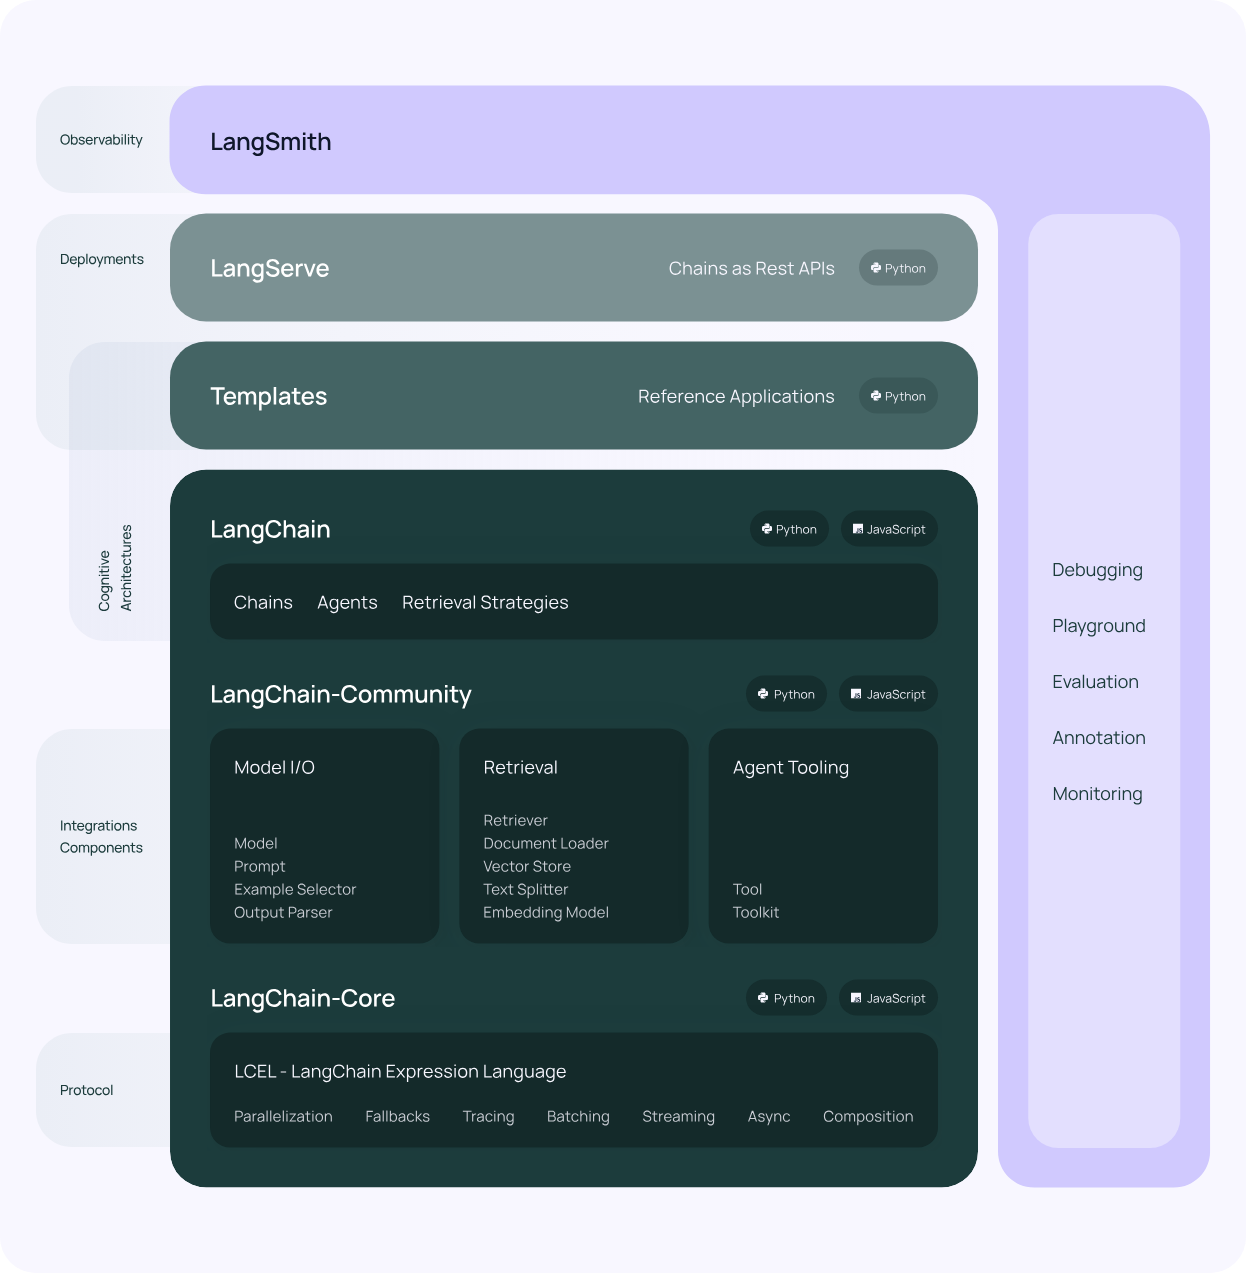






*   개발 단계 : reference 템플릿을 사용하여 Langchain/Langchain.js에 애플리케이션 작성
*   생산 단계 : LangSmith를 사용하여 체인을 검사, 테스트 및 모니터링
*   배포 단계 : LangServe를 사용하여 체인을 API화




# Langchain


1.   컴포넌트의 조립 및 통합 : Langchain은 언어 모델과의 작업을 위한 도구를 통합 제공한다. 그리고 모듈식으로 설계되어 사용하기 용이하다.
2.   즉시 사용 가능한 체인 : 고수준 작업을 위한 컴포넌트의 내장 조합을 제공. 해당 체인들은 개발 과정을 간소화하고 속도를 높여준다.

##### langchain 패키지 : langchain-core, langchain-community, langchbain



# LCEL(LangChain Expression Language)
##### LCEL은 체인을 구성하는 방법이다. 가장 단순한 "프롬프트 + LLM" 체인부터 가장 복잡한 체인까지 코드 변경 없이 실제 프로덕션에 도입될 수 있도록 설계되었다.

# 주요 모듈


*   모델 I/O : 프롬프트 관리, 최적화 및 LLM과의 인터페이스 작업을 위한 유틸리티
*   검색 : 데이터를 외부 데이터 소스에서 가져오는 작업 담당
*   에이전트 : 언어 모델이 어떤 조치를 취할지 결정하고, 해당 조치를 실행하며, 관찰하고, 필요한 경우 반복하는 과정을 수행





# 설치
##### 대게 langchain 설치로서 최소 요구 사항이 설치된다. 특정 통합에 대한 종속성은 별도로 설치해야 한다.

```python
# pip
pip install langchain
```

```python
# conda
conda install langchain -c conda-forge
```

# QuickStart
##### 아래와 같은 작업들을 수행한다.
*   Langchain, LangSmith 및 LangServe 설정
*   Langchain의 프롬프트 템플릿, 모델 및 출력 파서 사용
*   LCEL 사용
*   간단한 애플리케이션 구축




In [ ]:
pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


##### LangSmith를 사용할려면 사이트에 가입한 후 추적 로깅을 시작하도록 환경 변수를 설정해야 한다.

```python
export LANGCHAIN_TRACING_V2="true"
export LANGCHAIN_API_KEY="..."
```

# Langchain으로 구축


*   프롬프트 템플릿의 정보에 의해 응답하는 간단한 LLM
*   별도의 DB에서 데이터를 가져와 프롬프트 템플릿으로 전달하는 검색 체인 구축
*   채팅 기록을 추가하여 LLM과 상호 작용
*   LLM을 활용하여 질문에 답하기 위해 데이터를 가져와야 하는지 여부를 결정하는 에이전트 구축








## 간단한 LLM

In [ ]:
pip install langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.5/257.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00


In [ ]:
import os
os.environ['OPENAI_API_KEY'] = "EXAMPLE"

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI()

In [ ]:
llm.invoke("how can langsmith help with testing?")

AIMessage(content='Langsmith can help with testing by providing automated testing capabilities for code written in various programming languages. It can be used to write test cases, run tests, and generate reports on the test results. Langsmith can also be integrated with continuous integration tools to automate the testing process and ensure that code changes do not introduce any regressions. Additionally, Langsmith can help with performance testing, security testing, and other types of testing to ensure the quality and reliability of the software being developed.', response_metadata={'finish_reason': 'stop', 'logprobs': None})

##### 프롬프트 템플릿을 사용해서 응답을 유도하자.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are world class technical documentation writer."),
    ("user", "{input}")
])

In [ ]:
chain = prompt | llm

In [ ]:
chain.invoke({"input": "how can langsmith help with testing?"})

AIMessage(content='Langsmith is a powerful tool that can greatly assist with testing by providing the capability to automatically generate realistic and varied test data for software applications. Here are some ways Langsmith can help with testing:\n\n1. **Data Generation**: Langsmith can generate a wide range of test data, including text, numbers, dates, and more, allowing testers to create diverse test scenarios and cover edge cases.\n\n2. **Data Diversity**: Langsmith can create data that covers various data types, formats, and ranges, helping to ensure thorough test coverage and identify potential issues that may not be apparent with limited or repetitive test data.\n\n3. **Automated Testing**: Langsmith can be integrated with testing frameworks and automation tools to automatically generate and feed test data into test scripts, streamlining the testing process and increasing efficiency.\n\n4. **Scalability**: Langsmith can quickly generate large volumes of test data, enabling test

##### 채팅 메시지를 문자열로 변환하는 구문 분석기를 추가해서 출력을 확인하자

In [ ]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()

In [ ]:
chain = prompt | llm | output_parser

In [ ]:
chain.invoke({"input": "how can langsmith help with testing?"})

"Langsmith is a powerful tool that can greatly assist with testing by providing language generation capabilities. Here are some ways in which Langsmith can help with testing:\n\n1. **Test Data Generation**: Langsmith can generate a wide variety of test data, including random strings, numbers, dates, and more. This can be useful for creating test cases that cover a range of scenarios and edge cases.\n\n2. **Automated Test Case Generation**: By using Langsmith to generate test data, you can automate the process of creating test cases for your software. This can save time and ensure thorough test coverage.\n\n3. **Text Comparison and Validation**: Langsmith can be used to compare text outputs and validate the correctness of generated text against expected results. This can help in verifying the accuracy of your software's output.\n\n4. **Localization Testing**: Langsmith supports generating text in multiple languages, making it useful for localization testing. You can quickly generate tex

## 검색
##### 검색은 LLM에 직접 전달하기에 데이터가 너무 많은 경우에 유용하다. 검색기를 사용하여 가장 관련성이 높은 부분만 가져와서 전달할 수 있다.
##### 해당 과정에서 우리는 Retriever로부터 관련 문서를 조회 한 뒤 이를 프롬프트에 전달한다. 해당 데이터는 벡터 저장소를 채워 리트리버로 활용한다.

In [ ]:
pip install beautifulsoup4

In [ ]:
from langchain_community.document_loaders import WebBaseLoader
loader = WebBaseLoader("https://docs.smith.langchain.com/user_guide")

docs = loader.load()

##### 데이터를 벡터스토어로 인덱싱한다. (임베딩 모델 / 벡터스토어)

In [ ]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings()

In [ ]:
pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 28.1 MB/s eta 0:00:00


In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter()
documents = text_splitter.split_documents(docs)
vector = FAISS.from_documents(documents, embeddings)

##### 해당 데이터를 벡터 저장소에 색인화했고, 이제 검색 체인을 생성하자
##### 먼저 간단하게 질문과 검색된 문서를 가져와 답변을 생성하는 체인을 만들어보자

In [ ]:
from langchain.chains.combine_documents import create_stuff_documents_chain

prompt = ChatPromptTemplate.from_template("""Answer the following question based only on the provided context:

<context>
{context}
</context>

Question: {input}""")

document_chain = create_stuff_documents_chain(llm, prompt)

##### 문서를 직접 전달하여 실행도 가능하다.

In [ ]:
from langchain_core.documents import Document

document_chain.invoke({
    "input": "how can langsmith help with testing?",
    "context": [Document(page_content="langsmith can let you visualize test results")]
})

'Langsmith can help visualize test results.'

##### 하지만 방금 설정한 벡터 검색기에서 문서를 가져오도록 해야한다. 그래야 가장 관련성이 높은 문서를 동적으로 선택할 수 있어서다.

In [ ]:
from langchain.chains import create_retrieval_chain

retriever = vector.as_retriever()
retrieval_chain = create_retrieval_chain(retriever, document_chain)

In [ ]:
response = retrieval_chain.invoke({"input": "how can langsmith help with testing?"})
print(response["answer"])

LangSmith helps with testing by allowing developers to create datasets, run tests on their LLM applications, upload test cases in bulk, create custom evaluations, track and diagnose regressions, compare different configurations side-by-side, provide a playground environment for rapid iteration and experimentation, collect feedback from users, annotate traces, add runs to datasets, monitor key metrics over time, and conduct A/B testing on different versions of applications.


## 대화 검색
##### 방금 구축한 체인은 단 하나의 질문에만 대답할 수 있다. 우리는 여러 질문에 답할 수 있는 체인을 만들기 위해 기록을 고려해야 한다.
##### 가장 최근의 입력을 input 에 두고, 대화 기록을 chat_history에 저장하고, 검색 쿼리를 생산하기 위해 LLM을 사용한다.

In [ ]:
from langchain.chains import create_history_aware_retriever
from langchain_core.prompts import MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages([
    MessagesPlaceholder(variable_name="chat_history"),
    ("user", "{input}"),
    ("user", "Given the above conversation, generate a search query to look up in order to get information relevant to the conversation")
])
# 해당 리트리버 모델을 염두에 두고 체인 생성
retriever_chain = create_history_aware_retriever(llm, retriever, prompt)

##### 사용자의 후속 질문을 하는 인스턴스를 전달하여 테스트

In [ ]:
from langchain_core.messages import HumanMessage, AIMessage

chat_history = [HumanMessage(content="Can LangSmith help test my LLM applications?"), AIMessage(content="Yes!")]
retriever_chain.invoke({
    "chat_history": chat_history,
    "input": "Tell me how"
})

[Document(page_content='Skip to main content\uf8ffü¶úÔ∏è\uf8ffüõ†Ô∏è LangSmith DocsLangChain Python DocsLangChain JS/TS DocsLangSmith API DocsSearchGo to AppLangSmithUser GuideSetupPricing (Coming Soon)Self-HostingTracingEvaluationMonitoringPrompt HubProxyUser GuideOn this pageLangSmith User GuideLangSmith is a platform for LLM application development, monitoring, and testing. In this guide, we‚Äôll highlight the breadth of workflows LangSmith supports and how they fit into each stage of the application development lifecycle. We hope this will inform users how to best utilize this powerful platform or give them something to consider if they‚Äôre just starting their journey.Prototyping‚ÄãPrototyping LLM applications often involves quick experimentation between prompts, model types, retrieval strategy and other parameters.\nThe ability to rapidly understand how the model is performing ‚Äî and debug where it is failing ‚Äî is incredibly important for this phase.Debugging‚ÄãWhen developing

##### 이제 새로운 검색기가 있으므로 검색된 문서를 염두에 두고 대화를 계속하기 위한 새 체인을 만든다.

In [ ]:
prompt = ChatPromptTemplate.from_messages([
    ("system", "Answer the user's questions based on the below context:\n\n{context}"),
    MessagesPlaceholder(variable_name="chat_history"),
    ("user", "{input}"),
])
document_chain = create_stuff_documents_chain(llm, prompt)

retrieval_chain = create_retrieval_chain(retriever_chain, document_chain)

In [ ]:
chat_history = [HumanMessage(content="Can LangSmith help test my LLM applications?"), AIMessage(content="Yes!")]
retrieval_chain.invoke({
    "chat_history": chat_history,
    "input": "Tell me how"
})

{'chat_history': [HumanMessage(content='Can LangSmith help test my LLM applications?'),
  AIMessage(content='Yes!')],
 'input': 'Tell me how',
 'context': [Document(page_content='Skip to main content\uf8ffü¶úÔ∏è\uf8ffüõ†Ô∏è LangSmith DocsLangChain Python DocsLangChain JS/TS DocsLangSmith API DocsSearchGo to AppLangSmithUser GuideSetupPricing (Coming Soon)Self-HostingTracingEvaluationMonitoringPrompt HubProxyUser GuideOn this pageLangSmith User GuideLangSmith is a platform for LLM application development, monitoring, and testing. In this guide, we‚Äôll highlight the breadth of workflows LangSmith supports and how they fit into each stage of the application development lifecycle. We hope this will inform users how to best utilize this powerful platform or give them something to consider if they‚Äôre just starting their journey.Prototyping‚ÄãPrototyping LLM applications often involves quick experimentation between prompts, model types, retrieval strategy and other parameters.\nThe ability

## 에이전트 구축
##### 에이전트는 언어 모델을 사용하여 수행할 일련의 작업을 선택하는 것이다.
##### 체인에서는 일련의 작업이 코드로 하드코딩되지만 에이전트에서 언어 모델은 수행할 작업과 순서를 결정하는 추론 엔진으로 사용된다.
##### 에이전트는 방금 만든 리트리버와 검색 도구에 대한 엑세스가 필요하다. 그래야 LangSmith에 관한 질문의 대답을 용이하게 하고 최신 정보가 필요한 질문에 대답할 수 있다.

In [ ]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool = create_retriever_tool(
    retriever,
    "langsmith_search",
    "Search for information about LangSmith. For any questions about LangSmith, you must use this tool!",
)

In [ ]:
os.environ['TAVILY_API_KEY'] = 'EXAMPLE'

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

search = TavilySearchResults()

In [ ]:
tools = [retriever_tool, search]

##### 도구가 있으므로 이를 사용할 에이전트를 만들어보자

In [ ]:
pip install langchainhub

##### langchainhub를 사용해 미리 정의된 프롬프트를 얻을 수 있다.

In [ ]:
from langchain_openai import ChatOpenAI
from langchain import hub
from langchain.agents import create_openai_functions_agent
from langchain.agents import AgentExecutor

# Get the prompt to use - you can modify this!
prompt = hub.pull("hwchase17/openai-functions-agent")
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
agent = create_openai_functions_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [ ]:
agent_executor.invoke({"input": "how can langsmith help with testing?"})



> Entering new AgentExecutor chain...

Invoking: `langsmith_search` with `{'query': 'how can LangSmith help with testing'}`


Skip to main contentü¶úÔ∏èüõ†Ô∏è LangSmith DocsLangChain Python DocsLangChain JS/TS DocsLangSmith API DocsSearchGo to AppLangSmithUser GuideSetupPricing (Coming Soon)Self-HostingTracingEvaluationMonitoringPrompt HubProxyUser GuideOn this pageLangSmith User GuideLangSmith is a platform for LLM application development, monitoring, and testing. In this guide, we‚Äôll highlight the breadth of workflows LangSmith supports and how they fit into each stage of the application development lifecycle. We hope this will inform users how to best utilize this powerful platform or give them something to consider if they‚Äôre just starting their journey.Prototyping‚ÄãPrototyping LLM applications often involves quick experimentation between prompts, model types, retrieval strategy and other parameters.
The ability to rapidly understand how the model is performing ‚Äî and deb

{'input': 'how can langsmith help with testing?',
 'output': 'LangSmith can help with testing in various ways throughout the application development lifecycle. Here are some key ways LangSmith supports testing:\n\n1. Prototyping: LangSmith allows for quick experimentation between prompts, model types, retrieval strategies, and other parameters to understand how the model is performing and debug any issues.\n\n2. Debugging: LangSmith provides clear visibility and debugging information at each step of an LLM sequence, making it easier to identify and root-cause issues when things go wrong.\n\n3. Initial Test Set: Developers can create datasets of inputs and reference outputs to run tests on their LLM applications. LangSmith makes it easy to run custom evaluations to score test results.\n\n4. Comparison View: LangSmith offers a user-friendly comparison view for test runs to track and diagnose regressions in test scores across multiple revisions of an application.\n\n5. Playground: LangSmi

In [ ]:
agent_executor.invoke({"input": "what is the weather in SF?"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'weather in San Francisco'}`


[{'url': 'https://weather.com/weather/tenday/l/San Francisco CA USCA0987:1:US', 'content': "Comfy & Cozy\nThat's Not What Was Expected\nOutside\n'No-Name Storms' In Florida\nGifts From On High\nWhat To Do For Wheezing\nSurviving The Season\nStay Safe\nAir Quality Index\nAir quality is considered satisfactory, and air pollution poses little or no risk.\n Health & Activities\nSeasonal Allergies and Pollen Count Forecast\nNo pollen detected in your area\nCold & Flu Forecast\nFlu risk is low in your area\nWe recognize our responsibility to use data and technology for good. recents\nSpecialty Forecasts\n10 Day Weather-San Francisco, CA\nToday\nMon 18 | Day\nConsiderable cloudiness. Tue 19\nTue 19 | Day\nLight rain early...then remaining cloudy with showers in the afternoon. Wed 27\nWed 27 | Day\nOvercast with rain showers at times."}, {'url': 'https://www.wundergrou

{'input': 'what is the weather in SF?',
 'output': 'I found some sources where you can check the weather in San Francisco:\n1. [The Weather Channel - San Francisco, CA](https://weather.com/weather/tenday/l/San Francisco CA USCA0987:1:US)\n2. [Weather Underground - San Francisco, CA](https://www.wunderground.com/forecast/us/ca/san-francisco)\n3. [AccuWeather - San Francisco, CA Hourly Weather Forecast](https://www.accuweather.com/en/us/san-francisco/94103/hourly-weather-forecast/347629)\n4. [AccuWeather - San Francisco, CA Current Weather](https://www.accuweather.com/en/us/san-francisco/94103/current-weather/347629)\n5. [AccuWeather - San Francisco, CA Weather Forecast](https://www.accuweather.com/en/us/san-francisco/94103/weather-forecast/347629)\n\nYou can visit these links to get the latest weather information for San Francisco.'}

In [ ]:
chat_history = [HumanMessage(content="Can LangSmith help test my LLM applications?"), AIMessage(content="Yes!")]
agent_executor.invoke({
    "chat_history": chat_history,
    "input": "Tell me how"
})



> Entering new AgentExecutor chain...

Invoking: `langsmith_search` with `{'query': 'LangSmith LLM application testing services'}`


Skip to main contentü¶úÔ∏èüõ†Ô∏è LangSmith DocsLangChain Python DocsLangChain JS/TS DocsLangSmith API DocsSearchGo to AppLangSmithUser GuideSetupPricing (Coming Soon)Self-HostingTracingEvaluationMonitoringPrompt HubProxyUser GuideOn this pageLangSmith User GuideLangSmith is a platform for LLM application development, monitoring, and testing. In this guide, we‚Äôll highlight the breadth of workflows LangSmith supports and how they fit into each stage of the application development lifecycle. We hope this will inform users how to best utilize this powerful platform or give them something to consider if they‚Äôre just starting their journey.Prototyping‚ÄãPrototyping LLM applications often involves quick experimentation between prompts, model types, retrieval strategy and other parameters.
The ability to rapidly understand how the model is performing ‚Äî 

{'chat_history': [HumanMessage(content='Can LangSmith help test my LLM applications?'),
  AIMessage(content='Yes!')],
 'input': 'Tell me how',
 'output': "LangSmith provides a platform for LLM application development, monitoring, and testing. Here are some ways LangSmith can help test your LLM applications:\n\n1. Prototyping: LangSmith supports quick experimentation between prompts, model types, retrieval strategies, and other parameters for prototyping LLM applications.\n\n2. Debugging: LangSmith offers tracing capabilities to help developers debug issues in LLM applications by providing clear visibility and debugging information at each step of an LLM sequence.\n\n3. Initial Test Set: Developers can create datasets of inputs and reference outputs to run tests on their LLM applications. LangSmith makes it easy to run custom evaluations to score test results.\n\n4. Comparison View: LangSmith allows developers to compare different versions of their applications and track regressions in 

## LangServe 로 서비스
##### 필자는 fastapi로 배포를 즐겨함.

In [ ]:
pip install fastapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.3 MB/s eta 0:00:00


In [ ]:
pip install "langserve[all]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.6 MB/s eta 0:00:00


In [ ]:
from typing import List

from fastapi import FastAPI
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_community.document_loaders import WebBaseLoader
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.tools.retriever import create_retriever_tool
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain import hub
from langchain.agents import create_openai_functions_agent
from langchain.agents import AgentExecutor
from langchain.pydantic_v1 import BaseModel, Field
from langchain_core.messages import BaseMessage
from langserve import add_routes

# 1. 리트리버 로드
loader = WebBaseLoader("https://docs.smith.langchain.com/user_guide")
docs = loader.load()
text_splitter = RecursiveCharacterTextSplitter()
documents = text_splitter.split_documents(docs)
embeddings = OpenAIEmbeddings()
vector = FAISS.from_documents(documents, embeddings)
retriever = vector.as_retriever()

# 2. 도구 설정
retriever_tool = create_retriever_tool(
    retriever,
    "langsmith_search",
    "Search for information about LangSmith. For any questions about LangSmith, you must use this tool!",
)
search = TavilySearchResults()
tools = [retriever_tool, search]


# 3. 에이전트 생성
prompt = hub.pull("hwchase17/openai-functions-agent")
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
agent = create_openai_functions_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)


# 4. api 설정
app = FastAPI(
  title="LangChain Server",
  version="1.0",
  description="A simple API server using LangChain's Runnable interfaces",
)

# 5. 스키마 설정
class Input(BaseModel):
    input: str
    chat_history: List[BaseMessage] = Field(
        ...,
        extra={"widget": {"type": "chat", "input": "location"}},
    )


class Output(BaseModel):
    output: str

add_routes(
    app,
    agent_executor.with_types(input_type=Input, output_type=Output),
    path="/agent",
)

if __name__ == "__main__":
    import uvicorn

    uvicorn.run(app, host="localhost", port=8000)

```python
python serve.py
```
##### 해당 파일을 실행하면 localhost 8000번에서 수행된다.